In [1]:
pip install pandas-datareader

In [2]:
import numpy as np
import pandas as pd
import os, datetime
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from datetime import datetime, date
from datetime import timedelta
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import yfinance as yf
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.models import load_model

In [3]:
ticker_list = []
n1 = input('enter the number of stocks: ')
number_1 = int(n1)

while len(ticker_list) < number_1:
    item = input('Enter item to buy: ')

    # make sure item is not in list before appending
    if item not in ticker_list:
        ticker_list.append(item)

enter the number of stocks: 3
Enter item to buy: MSFT
Enter item to buy: AAPL
Enter item to buy: SPY


In [4]:
end_date = datetime.now()
start_date = end_date - timedelta(days = 10000)

def get_stock_data(stock_list,weight, start_date, end_date):
  D = {}
  for i in range(len(weight)) :
    D[i] = yf.download(stock_list[i], start_date, end_date)

  df = pd.DataFrame()
  for i in range(len(weight)-1) :
    df = df.add(D[i].mul(weight[i]), fill_value = 0)

  return df

In [5]:
# for weights currently I am using random allocation but I wll export optimized weights
import random

weights = [random.random() for _ in range(len(ticker_list))]

In [6]:
df = get_stock_data(ticker_list, weights, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [7]:
df=df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-08-27,7.179884,7.279011,7.171806,7.277908,4.556464,2.797481e+08
1,1996-08-28,7.292224,7.335787,7.282185,7.327710,4.587366,1.729230e+08
2,1996-08-29,7.306418,7.306418,7.210234,7.239603,4.532074,1.250315e+08
3,1996-08-30,7.248661,7.248661,7.145380,7.145380,4.473212,1.184420e+08
4,1996-09-03,7.116011,7.196040,7.035982,7.194078,4.503179,1.041089e+08
...,...,...,...,...,...,...,...
6886,2024-01-08,495.521192,503.965896,494.739212,503.467429,503.467429,7.299856e+07
6887,2024-01-09,499.591448,504.288002,497.800623,504.097551,504.097551,5.657681e+07
6888,2024-01-10,503.930081,512.817534,503.506729,511.361160,511.361160,6.430472e+07
6889,2024-01-11,514.602975,519.302623,506.931227,512.523476,512.523476,6.848005e+07


In [8]:
df['Volume'].replace(to_replace=0, method='ffill', inplace=True)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6891.000000,6891.000000,6891.000000,6891.000000,6891.000000,6.891000e+03
mean,94.026269,95.030843,93.023755,94.065751,86.413413,3.989364e+08
std,120.999438,122.249463,119.765635,121.075897,122.317952,3.512496e+08
min,7.108163,7.151726,7.035982,7.077813,4.428865,3.038111e+07
25%,26.045581,26.360962,25.743556,26.035294,17.537990,1.493480e+08
50%,36.216959,36.638980,35.748836,36.190956,26.873468,3.013654e+08
75%,89.249751,89.824337,88.838206,89.322077,82.541474,5.234607e+08
max,516.400213,519.302623,512.190072,516.301844,516.301844,6.590291e+09


In [9]:
# Apply moving average with a window of 10 days to all columns
df[['Open', 'High', 'Low', 'Close', 'Volume']] = df[['Open', 'High', 'Low', 'Close', 'Volume']].rolling(10).mean()

# Drop all rows with NaN values
df.dropna(how='any', axis=0, inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
9,1996-09-10,7.198624,7.243878,7.147385,7.208496,4.520915,1.786644e+08
10,1996-09-11,7.201177,7.245586,7.148579,7.207695,4.544821,1.669329e+08
11,1996-09-12,7.200975,7.263836,7.147018,7.221196,4.663028,1.812886e+08
12,1996-09-13,7.222284,7.295767,7.173687,7.257483,4.750784,1.907091e+08
13,1996-09-16,7.258767,7.344782,7.219690,7.307110,4.777530,2.060373e+08


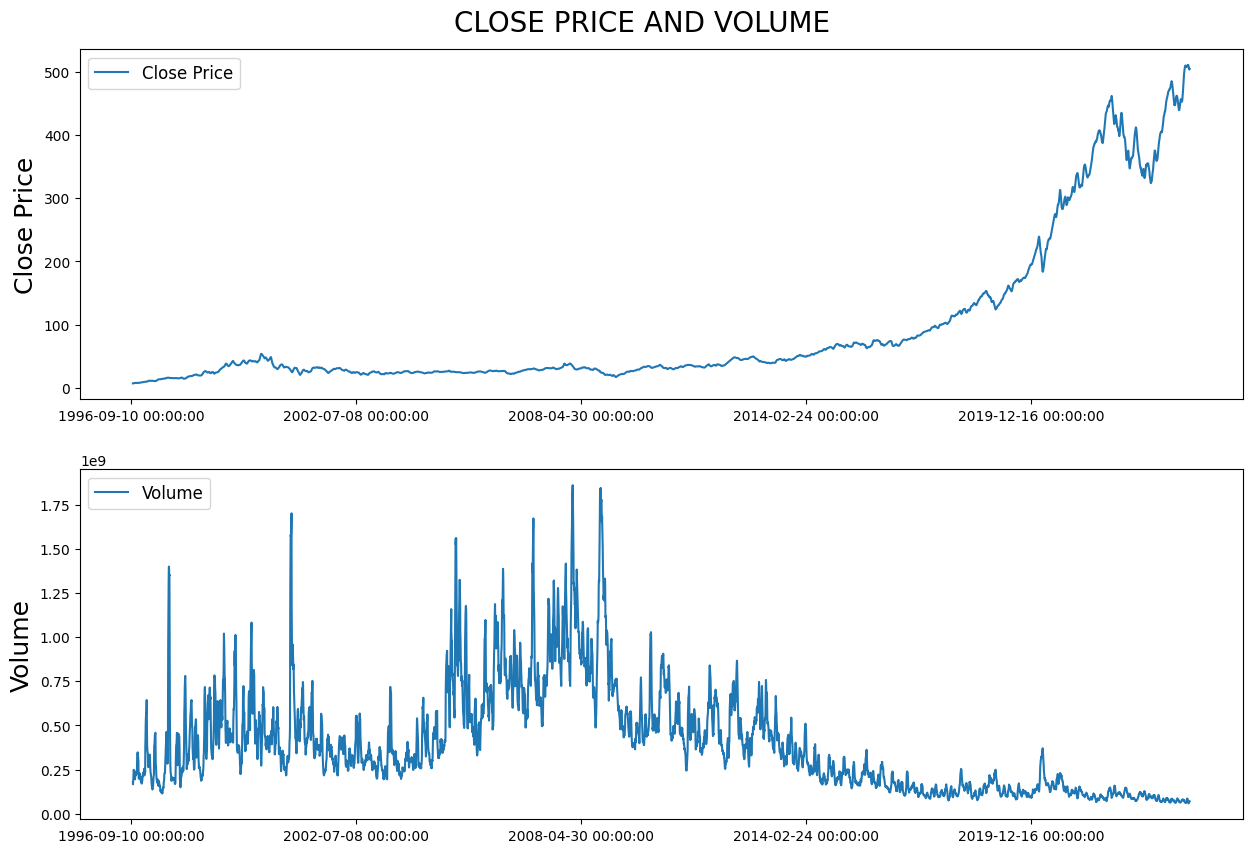

In [10]:
fig = plt.figure(figsize=(15,10))
st = fig.suptitle("CLOSE PRICE AND VOLUME", fontsize=20)
st.set_y(0.92)

ax1 = fig.add_subplot(211)
ax1.plot(df['Close'], label='Close Price')
ax1.set_xticks(range(0, df.shape[0], 1464))
ax1.set_xticklabels(df['Date'].loc[::1464])
ax1.set_ylabel('Close Price', fontsize=18)
ax1.legend(loc="upper left", fontsize=12)

ax2 = fig.add_subplot(212)
ax2.plot(df['Volume'], label='Volume')
ax2.set_xticks(range(0, df.shape[0], 1464))
ax2.set_xticklabels(df['Date'].loc[::1464])
ax2.set_ylabel('Volume', fontsize=18)
ax2.legend(loc="upper left", fontsize=12)

In [11]:
df.drop(columns=['Date'], inplace=True)
#df.drop(columns=['index'], inplace=True)
df.drop(columns=['Adj Close'], inplace=True)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
df = pd.DataFrame(df)
df.set_axis(['Open','High','Low','Close','Volume'], axis='columns', inplace=True)
df

<ipython-input-12-435fdc98ea08>:5: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  df.set_axis(['Open','High','Low','Close','Volume'], axis='columns', inplace=True)


,Open,High,Low,Close,Volume
0,0.000000,0.000000,7.327179e-07,0.000002,0.066763
1,0.000005,0.000003,3.119645e-06,0.000000,0.060252
2,0.000005,0.000039,0.000000e+00,0.000027,0.068220
3,0.000047,0.000103,5.330061e-05,0.000099,0.073449
4,0.000119,0.000199,1.452447e-04,0.000198,0.081957
...,...,...,...,...,...
6877,0.987464,0.988303,9.871065e-01,0.987586,0.002848
6878,0.985196,0.986667,9.850318e-01,0.986327,0.003316
6879,0.983827,0.986664,9.839786e-01,0.986593,0.004835
6880,0.985009,0.988347,9.840408e-01,0.987179,0.005539


In [13]:
times = sorted(df.index.values)
last_10pct = sorted(df.index.values)[-int(0.1*len(times))] # Last 10% of series
last_20pct = sorted(df.index.values)[-int(0.2*len(times))] # Last 20% of series

df_train = df[(df.index < last_20pct)]  # Training data are 80% of total data
df_val = df[(df.index >= last_20pct) & (df.index < last_10pct)]
df_test = df[(df.index >= last_10pct)]

In [14]:
train_data = df_train.values
val_data = df_val.values
test_data = df_test.values
print('Training data shape: {}'.format(train_data.shape))
print('Validation data shape: {}'.format(val_data.shape))
print('Test data shape: {}'.format(test_data.shape))

Training data shape: (5506, 5)
Validation data shape: (688, 5)
Test data shape: (688, 5)


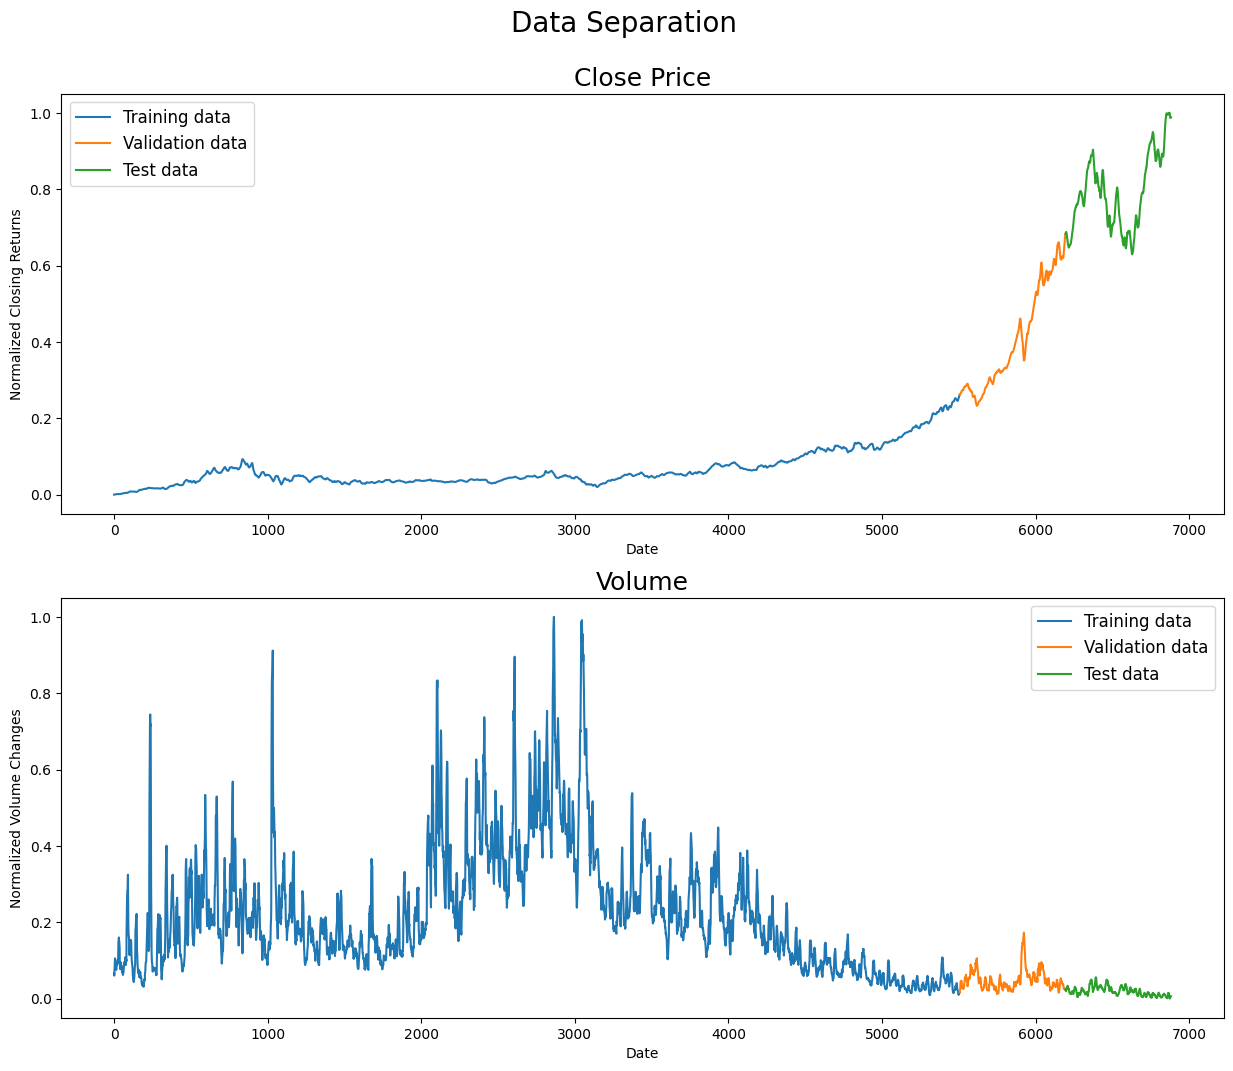

In [15]:
fig = plt.figure(figsize=(15,12))
st = fig.suptitle("Data Separation", fontsize=20)
st.set_y(0.95)

###############################################################################

ax1 = fig.add_subplot(211)
ax1.plot(np.arange(train_data.shape[0]), df_train['Close'], label='Training data')

ax1.plot(np.arange(train_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]), df_val['Close'], label='Validation data')

ax1.plot(np.arange(train_data.shape[0]+val_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Close'], label='Test data')
ax1.set_xlabel('Date')
ax1.set_ylabel('Normalized Closing Returns')
ax1.set_title("Close Price", fontsize=18)
ax1.legend(loc="best", fontsize=12)

###############################################################################

ax2 = fig.add_subplot(212)
ax2.plot(np.arange(train_data.shape[0]), df_train['Volume'], label='Training data')

ax2.plot(np.arange(train_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]), df_val['Volume'], label='Validation data')

ax2.plot(np.arange(train_data.shape[0]+val_data.shape[0],
                   train_data.shape[0]+val_data.shape[0]+test_data.shape[0]), df_test['Volume'], label='Test data')
ax2.set_xlabel('Date')
ax2.set_ylabel('Normalized Volume Changes')
ax2.set_title("Volume", fontsize=18)
ax2.legend(loc="best", fontsize=12)

In [16]:
batch_size = 32
seq_len = 128

d_k = 256
d_v = 256
n_heads = 12
ff_dim = 256

In [17]:
# Training data
X_train, y_train = [], []
for i in range(seq_len, len(train_data)):
  X_train.append(train_data[i-seq_len:i]) # Chunks of training data with a length of 128 df-rows
  y_train.append(train_data[:, 3][i]) #Value of 4th column (Close Price) of df-row 128+1
X_train, y_train = np.array(X_train), np.array(y_train)

###############################################################################

# Validation data
X_val, y_val = [], []
for i in range(seq_len, len(val_data)):
    X_val.append(val_data[i-seq_len:i])
    y_val.append(val_data[:, 3][i])
X_val, y_val = np.array(X_val), np.array(y_val)

###############################################################################

# Test data
X_test, y_test = [], []
for i in range(seq_len, len(test_data)):
    X_test.append(test_data[i-seq_len:i])
    y_test.append(test_data[:, 3][i])
X_test, y_test = np.array(X_test), np.array(y_test)

print('Training set shape', X_train.shape, y_train.shape)
print('Validation set shape', X_val.shape, y_val.shape)
print('Testing set shape' ,X_test.shape, y_test.shape)

Training set shape (5378, 128, 5) (5378,)
Validation set shape (560, 128, 5) (560,)
Testing set shape (560, 128, 5) (560,)


In [18]:
class Time2Vector(Layer):
  def __init__(self, seq_len, **kwargs):
    super(Time2Vector, self).__init__()
    self.seq_len = seq_len

  def build(self, input_shape):
    '''Initialize weights and biases with shape (batch, seq_len)'''
    self.weights_linear = self.add_weight(name='weight_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_linear = self.add_weight(name='bias_linear',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.weights_periodic = self.add_weight(name='weight_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

    self.bias_periodic = self.add_weight(name='bias_periodic',
                                shape=(int(self.seq_len),),
                                initializer='uniform',
                                trainable=True)

  def call(self, x):
    '''Calculate linear and periodic time features'''
    x = tf.math.reduce_mean(x[:,:,:4], axis=-1)
    time_linear = self.weights_linear * x + self.bias_linear # Linear time feature
    time_linear = tf.expand_dims(time_linear, axis=-1) # Add dimension (batch, seq_len, 1)

    time_periodic = tf.math.sin(tf.multiply(x, self.weights_periodic) + self.bias_periodic)
    time_periodic = tf.expand_dims(time_periodic, axis=-1) # Add dimension (batch, seq_len, 1)
    return tf.concat([time_linear, time_periodic], axis=-1) # shape = (batch, seq_len, 2)

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'seq_len': self.seq_len})
    return config

In [19]:
class SingleAttention(Layer):
  def __init__(self, d_k, d_v):
    super(SingleAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v

  def build(self, input_shape):
    self.query = Dense(self.d_k,
                       input_shape=input_shape,
                       kernel_initializer='glorot_uniform',
                       bias_initializer='glorot_uniform')

    self.key = Dense(self.d_k,
                     input_shape=input_shape,
                     kernel_initializer='glorot_uniform',
                     bias_initializer='glorot_uniform')

    self.value = Dense(self.d_v,
                       input_shape=input_shape,
                       kernel_initializer='glorot_uniform',
                       bias_initializer='glorot_uniform')

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    q = self.query(inputs[0])
    k = self.key(inputs[1])

    attn_weights = tf.matmul(q, k, transpose_b=True)
    attn_weights = tf.map_fn(lambda x: x/np.sqrt(self.d_k), attn_weights)
    attn_weights = tf.nn.softmax(attn_weights, axis=-1)

    v = self.value(inputs[2])
    attn_out = tf.matmul(attn_weights, v)
    return attn_out

#############################################################################

class MultiAttention(Layer):
  def __init__(self, d_k, d_v, n_heads):
    super(MultiAttention, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.attn_heads = list()

  def build(self, input_shape):
    for n in range(self.n_heads):
      self.attn_heads.append(SingleAttention(self.d_k, self.d_v))

    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1]=7
    self.linear = Dense(input_shape[0][-1],
                        input_shape=input_shape,
                        kernel_initializer='glorot_uniform',
                        bias_initializer='glorot_uniform')

  def call(self, inputs):
    attn = [self.attn_heads[i](inputs) for i in range(self.n_heads)]
    concat_attn = tf.concat(attn, axis=-1)
    multi_linear = self.linear(concat_attn)
    return multi_linear

#############################################################################

class TransformerEncoder(Layer):
  def __init__(self, d_k, d_v, n_heads, ff_dim, dropout=0.1, **kwargs):
    super(TransformerEncoder, self).__init__()
    self.d_k = d_k
    self.d_v = d_v
    self.n_heads = n_heads
    self.ff_dim = ff_dim
    self.attn_heads = list()
    self.dropout_rate = dropout

  def build(self, input_shape):
    self.attn_multi = MultiAttention(self.d_k, self.d_v, self.n_heads)
    self.attn_dropout = Dropout(self.dropout_rate)
    self.attn_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

    self.ff_conv1D_1 = Conv1D(filters=self.ff_dim, kernel_size=1, activation='relu')
    # input_shape[0]=(batch, seq_len, 7), input_shape[0][-1] = 7
    self.ff_conv1D_2 = Conv1D(filters=input_shape[0][-1], kernel_size=1)
    self.ff_dropout = Dropout(self.dropout_rate)
    self.ff_normalize = LayerNormalization(input_shape=input_shape, epsilon=1e-6)

  def call(self, inputs): # inputs = (in_seq, in_seq, in_seq)
    attn_layer = self.attn_multi(inputs)
    attn_layer = self.attn_dropout(attn_layer)
    attn_layer = self.attn_normalize(inputs[0] + attn_layer)

    ff_layer = self.ff_conv1D_1(attn_layer)
    ff_layer = self.ff_conv1D_2(ff_layer)
    ff_layer = self.ff_dropout(ff_layer)
    ff_layer = self.ff_normalize(inputs[0] + ff_layer)
    return ff_layer

  def get_config(self): # Needed for saving and loading model with custom layer
    config = super().get_config().copy()
    config.update({'d_k': self.d_k,
                   'd_v': self.d_v,
                   'n_heads': self.n_heads,
                   'ff_dim': self.ff_dim,
                   'attn_heads': self.attn_heads,
                   'dropout_rate': self.dropout_rate})
    return config


In [20]:
def create_model():
  '''Initialize time and transformer layers'''
  time_embedding = Time2Vector(seq_len)
  attn_layer1 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer2 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)
  attn_layer3 = TransformerEncoder(d_k, d_v, n_heads, ff_dim)

  '''Construct model'''
  in_seq = Input(shape=(seq_len, 5))
  x = time_embedding(in_seq)
  x = Concatenate(axis=-1)([in_seq, x])
  x = attn_layer1((x, x, x))
  x = attn_layer2((x, x, x))
  x = attn_layer3((x, x, x))
  x = GlobalAveragePooling1D(data_format='channels_first')(x)
  x = Dropout(0.1)(x)
  x = Dense(64, activation='relu')(x)
  x = Dropout(0.1)(x)
  out = Dense(1, activation='linear')(x)

  apple_stocks_model = Model(inputs=in_seq, outputs=out)
  apple_stocks_model.compile(loss='mse', optimizer=Adam(learning_rate=0.0001), metrics=['mae', 'mape','accuracy'])
  return apple_stocks_model


apple_stocks_model = create_model()
apple_stocks_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 128, 5)]             0         []                            
                                                                                                  
 time2_vector (Time2Vector)  (None, 128, 2)               512       ['input_1[0][0]']             
                                                                                                  
 concatenate (Concatenate)   (None, 128, 7)               0         ['input_1[0][0]',             
                                                                     'time2_vector[0][0]']        
                                                                                                  
 transformer_encoder (Trans  (None, 128, 7)               99114     ['concatenate[0][0]',     

In [21]:
callback = tf.keras.callbacks.ModelCheckpoint('Transformer+TimeEmbedding.hdf5',
                                              monitor='val_loss',
                                              save_best_only=True, verbose=1)

In [23]:
history=apple_stocks_model.fit(
    x=X_train,
    y=y_train,
    batch_size=32,
    epochs=5,
    verbose='auto',
    callbacks=[callback],
    validation_split=0.0,
    validation_data=(X_val,y_val),
    class_weight=None,
    sample_weight=None,
    initial_epoch=0,
    steps_per_epoch=7941//32,
    validation_steps=881//32,
    validation_batch_size=32,
)

Epoch 1/5
248/248 [==============================] - ETA: 0s - loss: 1.1830e-04 - mae: 0.0079 - mape: 14.8887 - accuracy: 0.0000e+00


Epoch 1: val_loss improved from inf to 0.05474, saving model to Transformer+TimeEmbedding.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


248/248 [==============================] - 743s 3s/step - loss: 1.1830e-04 - mae: 0.0079 - mape: 14.8887 - accuracy: 0.0000e+00 - val_loss: 0.0547 - val_mae: 0.1957 - val_mape: 39.5376 - val_accuracy: 0.0000e+00
Epoch 2/5
248/248 [==============================] - ETA: 0s - loss: 9.9933e-05 - mae: 0.0074 - mape: 13.9434 - accuracy: 0.0000e+00

248/248 [==============================] - 687s 3s/step - loss: 9.9933e-05 - mae: 0.0074 - mape: 13.9434 - accuracy: 0.0000e+00
Epoch 3/5
248/248 [==============================] - ETA: 0s - loss: 9.3294e-05 - mae: 0.0072 - mape: 13.6188 - accuracy: 0.0000e+00

248/248 [==============================] - 679s 3s/step - loss: 9.3294e-05 - mae: 0.0072 - mape: 13.6188 - accuracy: 0.0000e+00
Epoch 4/5
101/248 [===========>..................] - ETA: 6:46 - loss: 8.2028e-05 - mae: 0.0067 - mape: 12.4942 - accuracy: 0.0000e+00

248/248 [==============================] - 281s 1s/step - loss: 8.2028e-05 - mae: 0.0067 - mape: 12.4942 - accuracy: 0.0000e+00


In [24]:
model = tf.keras.models.load_model(r"Transformer+TimeEmbedding.hdf5",
                                   custom_objects={'Time2Vector': Time2Vector,
                                                   'SingleAttention': SingleAttention,
                                                   'MultiAttention': MultiAttention,
                                                   'TransformerEncoder': TransformerEncoder})

In [25]:
train_pred = model.predict(X_train)
val_pred = model.predict(X_val)
test_pred = model.predict(X_test)

18/18 [==============================] - 16s 920ms/step


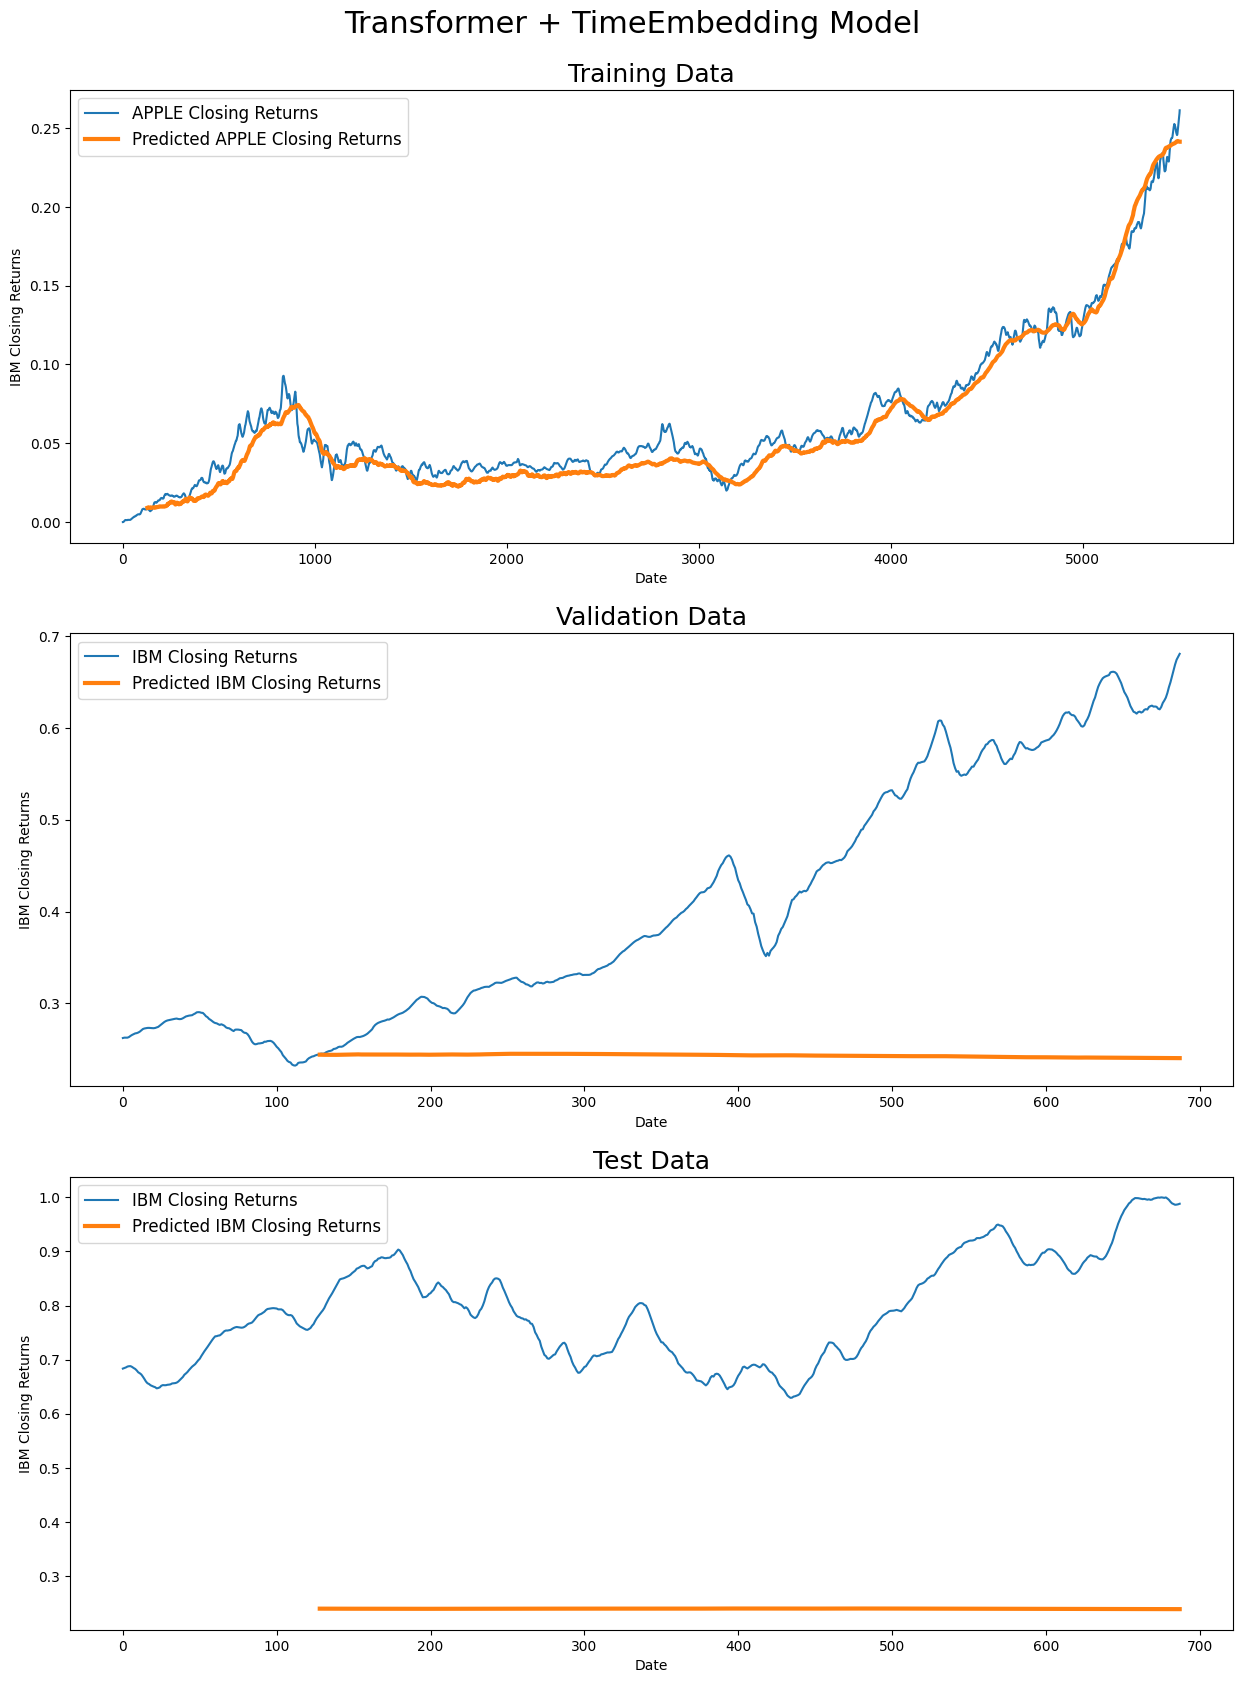

In [26]:
fig = plt.figure(figsize=(15,20))
st = fig.suptitle("Transformer + TimeEmbedding Model", fontsize=22)
st.set_y(0.92)

#Plot training data results
ax11 = fig.add_subplot(311)
ax11.plot(train_data[:, 3], label='APPLE Closing Returns')
ax11.plot(np.arange(seq_len, train_pred.shape[0]+seq_len), train_pred, linewidth=3, label='Predicted APPLE Closing Returns')
ax11.set_title("Training Data", fontsize=18)
ax11.set_xlabel('Date')
ax11.set_ylabel('IBM Closing Returns')
ax11.legend(loc="best", fontsize=12)

#Plot validation data results
ax21 = fig.add_subplot(312)
ax21.plot(val_data[:, 3], label='IBM Closing Returns')
ax21.plot(np.arange(seq_len, val_pred.shape[0]+seq_len), val_pred, linewidth=3, label='Predicted IBM Closing Returns')
ax21.set_title("Validation Data", fontsize=18)
ax21.set_xlabel('Date')
ax21.set_ylabel('IBM Closing Returns')
ax21.legend(loc="best", fontsize=12)

#Plot test data results
ax31 = fig.add_subplot(313)
ax31.plot(test_data[:, 3], label='IBM Closing Returns')
ax31.plot(np.arange(seq_len, test_pred.shape[0]+seq_len), test_pred, linewidth=3, label='Predicted IBM Closing Returns')
ax31.set_title("Test Data", fontsize=18)
ax31.set_xlabel('Date')
ax31.set_ylabel('IBM Closing Returns')
ax31.legend(loc="best", fontsize=12)